In [1]:
import cv2
import matplotlib.pyplot as plt
import sys # import requiered module
sys.path.append("..") # append the path of the parent directory

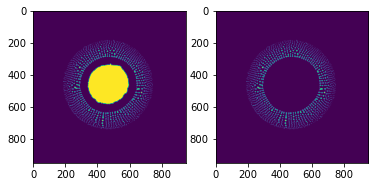

In [2]:
from functions.getOtsu import getOtsu
from functions.removeCore import removeCore

img,otsu  = getOtsu(frameNumber=50, cropFlag=False)
otsu_masked = removeCore(bw=otsu)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(otsu)
axs[1].imshow(otsu_masked)
plt.show()

In [5]:
from functions.diameters import centerAndAllDiameters

center, _, rb, rs = centerAndAllDiameters(frame=otsu)

# Statistics

In [24]:
import numpy as np

output = cv2.connectedComponentsWithStats(otsu_masked, 8, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

centroids = centroids[1:] - center
radius = np.sqrt(centroids[:,0]**2 + centroids[:,1]**2)



x = stats[1:, cv2.CC_STAT_LEFT]
y = stats[1:, cv2.CC_STAT_TOP]
w = stats[1:, cv2.CC_STAT_WIDTH]
h = stats[1:, cv2.CC_STAT_HEIGHT]
A = stats[1:, cv2.CC_STAT_AREA]

In [16]:
centroids

array([[  -6.  , -276.25],
       [  33.  , -276.75],
       [ -16.  , -275.  ],
       ...,
       [  -2.  ,  274.  ],
       [  12.  ,  274.  ],
       [  17.  ,  274.5 ]])